# モンテカルロ法を用いて、巡回セールスマン問題(TSP)を解く

## ＜巡回セールスマン問題とは何か＞
　巡回セールスマン問題とは、複数の都市と都市間の移動距離が与えられたとき、ある都市からすべての都市を回り、また初めの都市に戻る最短経路を求める問題である。

## ＜モンテカルロ法とは何か＞

　問題に確率を結びつけて解を求める方法である。
 
　今回はメトロポリス法である。

## ＜今回のアルゴリズム＞
1. 経路1での総移動距離を求める。これをE1とする。

2. 経路1からランダムに2つの都市を選び順番を交換する。これを経路2とする。

3. 経路2の総移動距離を求める。これをE2とする。

4. dE = E2 - E1を計算する。変更された部分だけの差を求めたほうが計算量が少なく済む。

5. dE < 0 ならば、経路2を採用する。

6. dE > 0 ならば、式(1)より確率Pで経路2を採用する。（ボルツマン定数があるかもしれない）

7. これを繰り返す。

$$ \large{ P = e^\frac{-dE}{T}} \qquad (1)$$

＊温度の設定は重要である。

＊あらかじめ距離を計算しておくと、毎回計算する必要がないので、処理が軽くなる

## ＜シミュレーテッドアニーリング（SA、焼きなまし法）＞

　温度の設定が重要である。式(1)をみると温度Tが大きいとき、Pの値はほぼ１になるので新しい配置が採用される確率が高い。逆に温度Tが小さいとき、Pの値はほぼ 0 になるので新しい配置が採用される確率は小さい。

　温度の初期値を十分高くし、その温度での適当な回数試行した後温度を下げる。下げた温度で同じように適当な回数試行し温度を下げる。これを繰り返すことで、局所的最適解にとどまらず、真の最適解を求めることができる可能性が高い。
 
　その温度でどのくらいの回数の試行が必要かはやってみるしかないが、温度が高いときは試行回数を少なく温度が低いときは試行回数を多くすると良い。

## ＜気にすること＞

・初期温度と下げ方

・その温度での試行回数

## ＜コード＞

In [21]:
%matplotlib inline
import numpy as np
import math, random
import copy
import matplotlib.pyplot as plt

In [22]:
class TSP:
    def __init__(self):
        self.city = []    # 街リスト
        self.N = 16       # 街の数
        self.T = 3.0      # 温度
        self.Earray = []  # Eを保存、グラフのため

    def city_create(self):
        for i in range(self.N):
            a = []
            a.append(i)
            a.append(random.uniform(0.0, 1.0))
            a.append(random.uniform(0.0, 1.0))
            self.city.append(a)

    def shuff(self):
        # 0番目以外で二つの都市を交換
        ran1 = random.randint(1, self.N-1)
        ran2 = random.randint(1, self.N-1)
        rcity = copy.copy(self.city[ran1])
        self.city[ran1] = copy.copy(self.city[ran2])
        self.city[ran2] = copy.copy(rcity)

    def energy(self):
        E = 0.0
        for i in range(1, self.N-1):
            E += math.sqrt(math.pow(self.city[i+1][1]-self.city[i][1], 2) + math.pow(self.city[i+1][2]-self.city[i][2], 2))
        E += math.sqrt(math.pow(self.city[self.N-1][1]-self.city[0][1], 2) + math.pow(self.city[self.N-1][2]-self.city[0][2], 2))
        return E

    def Enote(self, E1, E2):
        if E1 <= E2:
            self.Earray.append(E1)
        elif E1 > E2:
            self.Earray.append(E2)

    def judge(self, E1, E2, pcity):
        # 判定
        dE = E2 - E1
        if(dE < 0):
            pass
        else:
            ran = random.random()
            p = 0
            if(self.T > 0.00001):
                p = math.exp(-dE / self.T)
            else:
                p = math.exp(-100000000000000)
            if(p > ran):
                pass
            else:
                self.city = copy.copy(pcity)

    def dancing(self):
        # メインの処理
        times = 1.11 # 試行回数を決定
        plus = 50   # 試行回数に少し足す
        for k in range(100):
            for j in range(int(times)+plus):
                E1 = 0.0
                E2 = 0.0
                # 現在の経路を保存
                pcity = copy.copy(self.city)
                # 現在の総移動距離
                E1 = self.energy()
                # シャッフル
                self.shuff()
                # 遷移後の総移動距離
                E2 = self.energy()
                # 判定
                self.judge(E1, E2, pcity)
                # 1000回に1回取得
                if(j % 1000 == 0):
                    self.Enote(E1, E2)
            self.T -= 0.03 # 1step温度を下げる
            times *= 1.11
            plus += 10

    def result(self): 
        # ルート表示
        print("root",end=" : ")
        for i in range(self.N):
            print(self.city[i][0],end=" ")
        print(self.city[0][0])

    def draw(self):
        # プロット
        plt.plot(self.city[0][1], self.city[0][2], "ro")
        for j in range(1, self.N):
            plt.plot(self.city[j][1], self.city[j][2], "bo")
        for i in range(self.N-1):
            plt.plot([self.city[i][1], self.city[i+1][1]], [self.city[i][2], self.city[i+1][2]], 'k-', lw=1)
        plt.plot([self.city[0][1], self.city[self.N-1][1]], [self.city[0][2], self.city[self.N-1][2]], 'k-', lw=1)
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")

    def draw2(self):
        for i in range(len(self.Earray)-1):
            plt.plot([i, i+1], [self.Earray[i], self.Earray[i+1]], 'k-', lw=1)
        plt.xlabel("times")
        plt.ylabel("cost")

In [23]:
b = TSP()
b.city_create()
b.dancing()

In [24]:
b.result()

root : 0 8 6 7 2 13 4 5 14 15 12 11 3 10 9 1 0


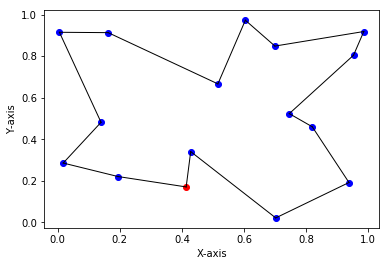

In [25]:
b.draw()

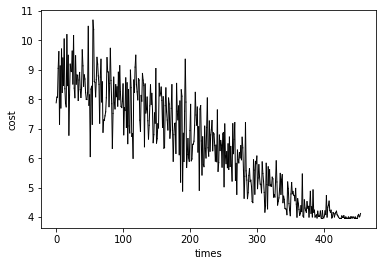

In [26]:
b.draw2()